In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.datasets import make_circles
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils

from keras.layers import Dense, Activation
from keras.models import Sequential


In [3]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

print X.shape, y.shape

(1000, 2) (1000,)


In [4]:
Y = np_utils.to_categorical(y)
print Y.shape

(1000, 2)


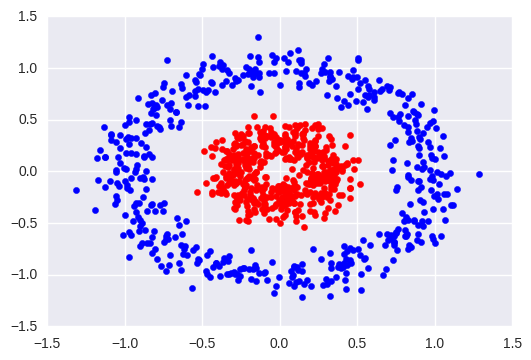

In [5]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        sns.plt.scatter(X[ix, 0], X[ix, 1], color='blue')
    else:
        sns.plt.scatter(X[ix, 0], X[ix, 1], color='red')
plt.show()

In [37]:
model = Sequential()

model.add(Dense(5, input_shape=(2,)))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 5)                 15        
_________________________________________________________________
activation_17 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 12        
_________________________________________________________________
activation_18 (Activation)   (None, 2)                 0         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [38]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
y_train = Y[:split]

X_test = X[split:]
y_test = Y[split:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(800, 2) (800, 2)
(200, 2) (200, 2)


In [39]:
hist = model.fit(X_train, y_train,
                epochs=100,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test, y_test), verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
0s - loss: 0.6543 - acc: 0.5500 - val_loss: 0.6865 - val_acc: 0.5150
Epoch 2/100
0s - loss: 0.6373 - acc: 0.6225 - val_loss: 0.6710 - val_acc: 0.5600
Epoch 3/100
0s - loss: 0.6269 - acc: 0.6637 - val_loss: 0.6594 - val_acc: 0.5850
Epoch 4/100
0s - loss: 0.6184 - acc: 0.6975 - val_loss: 0.6497 - val_acc: 0.6050
Epoch 5/100
0s - loss: 0.6113 - acc: 0.7000 - val_loss: 0.6414 - val_acc: 0.6300
Epoch 6/100
0s - loss: 0.6047 - acc: 0.7225 - val_loss: 0.6338 - val_acc: 0.6500
Epoch 7/100
0s - loss: 0.5989 - acc: 0.7337 - val_loss: 0.6267 - val_acc: 0.6700
Epoch 8/100
0s - loss: 0.5933 - acc: 0.7562 - val_loss: 0.6202 - val_acc: 0.6950
Epoch 9/100
0s - loss: 0.5881 - acc: 0.7700 - val_loss: 0.6140 - val_acc: 0.7050
Epoch 10/100
0s - loss: 0.5831 - acc: 0.7737 - val_loss: 0.6082 - val_acc: 0.7050
Epoch 11/100
0s - loss: 0.5784 - acc: 0.7925 - val_loss: 0.6025 - val_acc: 0.7100
Epoch 12/100
0s - loss: 0.5738 - acc: 0.8000 - val_loss: 0.59

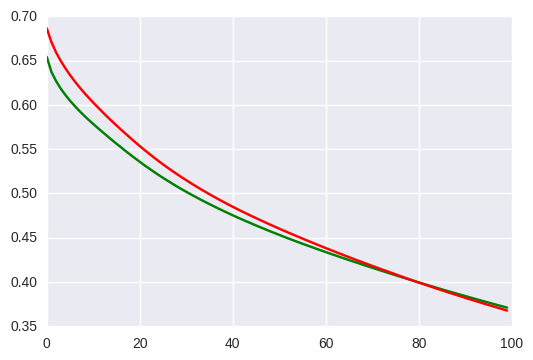

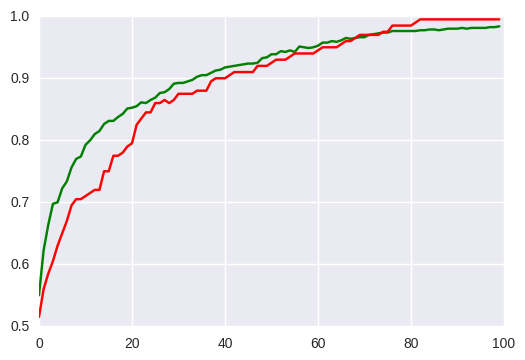

In [40]:
data = hist.history

plt.figure(0)
plt.plot(data['loss'], 'g')
plt.plot(data['val_loss'], 'r')

plt.figure(1)
plt.plot(data['acc'], 'g')
plt.plot(data['val_acc'], 'r')

plt.show()

In [ ]:
# GPU service: Floydhub